# 1. Importing Libraries

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [267]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Sourcing

In [268]:
raw_data = pd.read_csv('train.csv')

In [269]:
raw_data.shape

(1460, 81)

In [270]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [271]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Dropping Id Column as pandas will automatically assign Id to each row

In [272]:
raw_data = raw_data.drop(columns=['Id'])

# 3. Pre-Defined Graph Functions

#### Bar Plot

In [273]:
def plot_bar_graph_from_series(data, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    graph = sns.barplot(x=data.index, y=data.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

# 4. Data Cleaning

In [274]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 4.1 Dwelling Type (MSSubClass)

#### Identifying Null Values 

In [275]:
raw_data.MSSubClass.isna().sum()

0

In [276]:
ms_sub_df = raw_data.MSSubClass.value_counts(sort=False)

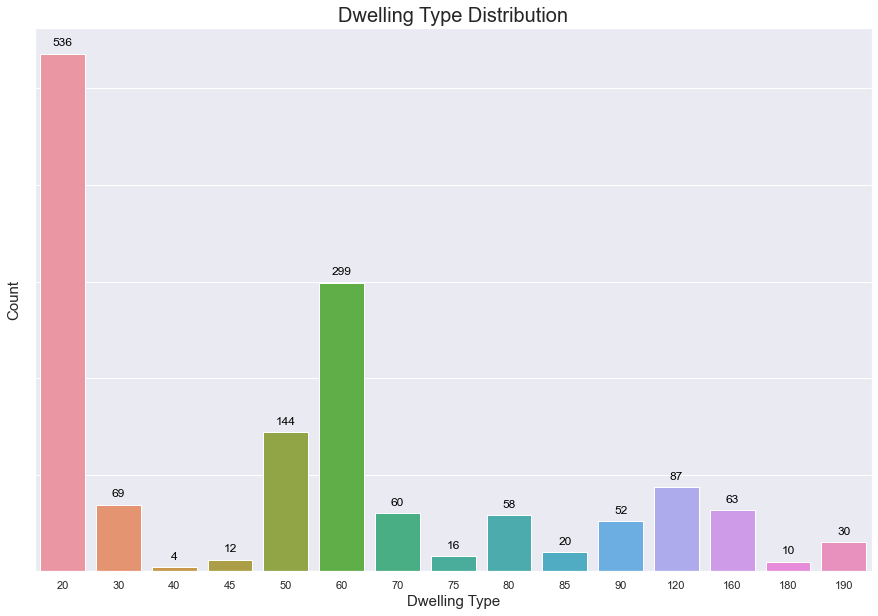

In [277]:
plot_bar_graph_from_series(data=ms_sub_df, plot_title='Dwelling Type Distribution', x_axis_label='Dwelling Type',
                           y_axis_label='Count', data_label_rotation='horizontal')

### 4.2 Zone Classification

In [278]:
raw_data.MSZoning.isna().sum()

0

In [279]:
ms_zone_df = raw_data.MSZoning.value_counts(sort=False)

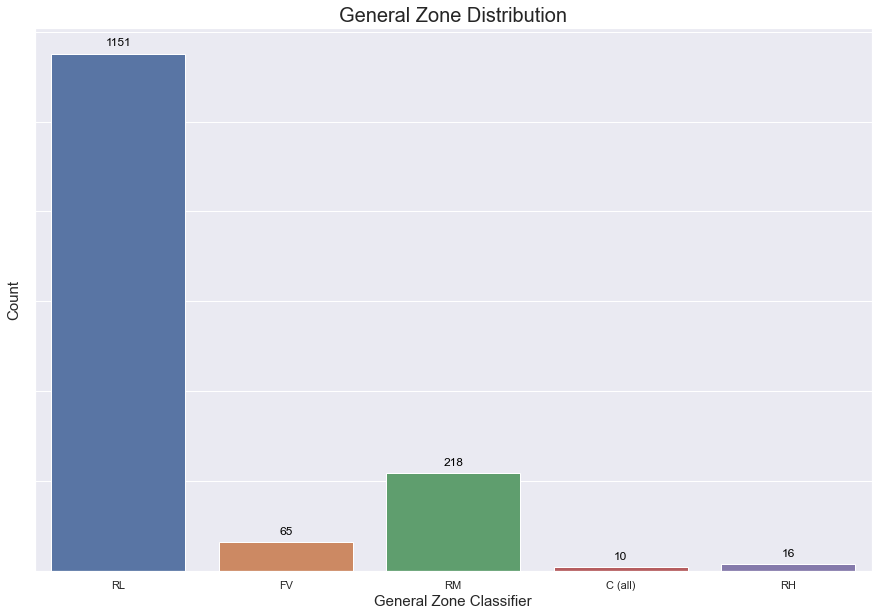

In [280]:
plot_bar_graph_from_series(data=ms_zone_df, plot_title='General Zone Distribution', x_axis_label='General Zone Classifier',
                           y_axis_label='Count', data_label_rotation='horizontal')

### 3.3 Lot Frontage (=========> Remaining <=========)

In [281]:
raw_data.LotFrontage.isna().sum()

259

### 3.4 Lot Area

In [282]:
raw_data.LotArea.isna().sum()

0

In [283]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [284]:
raw_data.LotArea.describe(percentiles=np.arange(0, 1.1, 0.1))

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
0%         1300.000000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64

In [285]:
raw_data.LotArea[raw_data.LotArea < raw_data.LotArea.quantile(0.99)].count()

1445

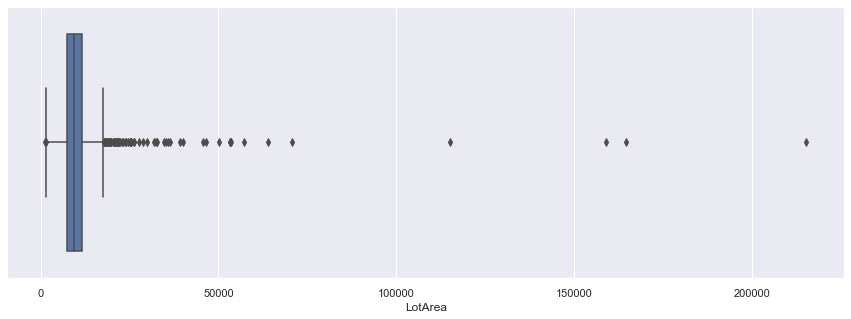

In [286]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.LotArea)
plt.show()

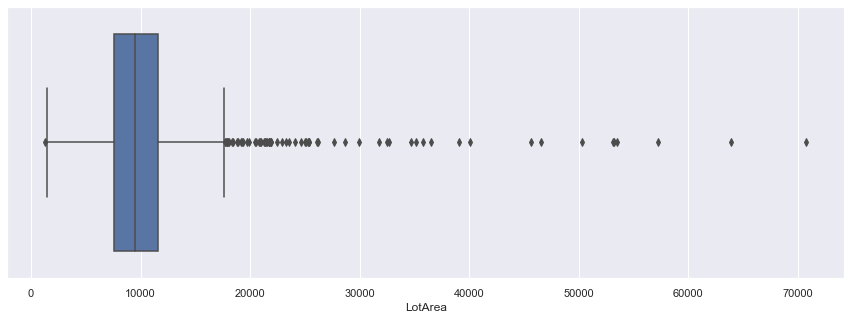

In [287]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.LotArea[raw_data.LotArea < 100000])
plt.show()

### 3.5 Street

In [288]:
street_df = raw_data.Street.value_counts(sort=False)
street_df

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [289]:
raw_data.Street = raw_data.Street.map({'Grvl': 0, 'Pave': 1})

In [290]:
raw_data.Street.value_counts(sort=False)

0       6
1    1454
Name: Street, dtype: int64

### 3.6 Alley

In [291]:
alley_df = raw_data.Alley.value_counts(sort=False)
alley_df

Pave    41
Grvl    50
Name: Alley, dtype: int64

In [292]:
round(raw_data.Alley.isna().sum() / len(raw_data.Alley) * 100, 2)

93.77

#### More than 90% of value are missing. We shall be dropping this column.

In [293]:
raw_data = raw_data.drop(columns=['Alley'])

### 3.7 Lot Shape

In [294]:
lot_shape_df = raw_data.LotShape.value_counts(sort=False)
lot_shape_df

IR1    484
Reg    925
IR3     10
IR2     41
Name: LotShape, dtype: int64

In [295]:
raw_data.LotShape = raw_data.LotShape.map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

In [296]:
raw_data.LotShape.value_counts(sort=False)

0     10
1     41
2    484
3    925
Name: LotShape, dtype: int64

### 3.8 Land Contour

In [297]:
land_cont_df = raw_data.LandContour.value_counts(sort=False)
land_cont_df

Bnk      63
Lvl    1311
HLS      50
Low      36
Name: LandContour, dtype: int64

In [298]:
raw_data.LandContour = raw_data.LandContour.map({'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3})

In [299]:
raw_data.LandContour.value_counts(sort=False)

0      36
1      50
2      63
3    1311
Name: LandContour, dtype: int64

### 3.9 Utiltities

In [300]:
utility_df = raw_data.Utilities.value_counts(sort=False)
utility_df

NoSeWa       1
AllPub    1459
Name: Utilities, dtype: int64

In [301]:
raw_data.Utilities = raw_data.Utilities.map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})

In [302]:
raw_data.Utilities.value_counts(sort=False)

1       1
3    1459
Name: Utilities, dtype: int64

### 3.10 Lot Configuration

In [303]:
lot_config_df = raw_data.LotConfig.value_counts(sort=False)
lot_config_df

Inside     1052
FR2          47
CulDSac      94
Corner      263
FR3           4
Name: LotConfig, dtype: int64

### 3.11 Land Slope

In [304]:
land_slope_df = raw_data.LandSlope.value_counts(sort=False)
land_slope_df

Mod      65
Sev      13
Gtl    1382
Name: LandSlope, dtype: int64

In [305]:
raw_data.LandSlope = raw_data.LandSlope.map({'Sev': 0, 'Mod': 1, 'Gtl': 2})

In [306]:
raw_data.LandSlope.value_counts(sort=False)

0      13
1      65
2    1382
Name: LandSlope, dtype: int64

### 3.12 Neighbourhood

In [307]:
neighbourhood_df = raw_data.Neighborhood.value_counts(sort=False)
neighbourhood_df

Edwards    100
Timber      38
Blueste      2
NWAmes      73
MeadowV     17
Blmngtn     17
StoneBr     25
Somerst     86
Crawfor     51
SWISU       25
NPkVill      9
OldTown    113
NAmes      225
Veenker     11
SawyerW     59
ClearCr     28
BrDale      16
BrkSide     58
Gilbert     79
Mitchel     49
Sawyer      74
IDOTRR      37
CollgCr    150
NoRidge     41
NridgHt     77
Name: Neighborhood, dtype: int64

### 3.13 Condition 1

In [308]:
raw_data.Condition1.isna().sum()

0

In [309]:
condition_1_df = raw_data.Condition1.value_counts(sort=False)
condition_1_df

RRAe        11
PosN        19
RRNe         2
Artery      48
Norm      1260
RRAn        26
Feedr       81
PosA         8
RRNn         5
Name: Condition1, dtype: int64

### 3.14 Condition 2

In [310]:
raw_data.Condition2.isna().sum()

0

In [311]:
condition_2_df = raw_data.Condition2.value_counts(sort=False)
condition_2_df

RRAe         1
PosN         2
Artery       2
Norm      1445
RRAn         1
Feedr        6
PosA         1
RRNn         2
Name: Condition2, dtype: int64

### 3.15 Building Type

In [312]:
raw_data.BldgType.isna().sum()

0

In [313]:
building_type_df = raw_data.BldgType.value_counts(sort=False)
building_type_df

2fmCon      31
1Fam      1220
Duplex      52
Twnhs       43
TwnhsE     114
Name: BldgType, dtype: int64

### 3.16 House Style

In [314]:
raw_data.HouseStyle.isna().sum()

0

In [315]:
housing_style_df = raw_data.HouseStyle.value_counts(sort=False)
housing_style_df

1.5Unf     14
1Story    726
1.5Fin    154
SFoyer     37
2.5Fin      8
2Story    445
SLvl       65
2.5Unf     11
Name: HouseStyle, dtype: int64

### 3.17 Overall Quality

In [316]:
raw_data.OverallQual.isna().sum()

0

In [317]:
overall_quality_df = raw_data.OverallQual.value_counts(sort=False)
overall_quality_df

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

### 3.18 Overall Condition

In [318]:
raw_data.OverallCond.isna().sum()

0

In [319]:
overall_cond_df = raw_data.OverallCond.value_counts(sort=False)
overall_cond_df

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64

### 3.19 Year Built

In [320]:
raw_data.YearBuilt.isna().sum()

0

In [321]:
year_df = raw_data.YearBuilt.value_counts(sort=False)
year_df

1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64

### 3.20 Remodel Year

In [322]:
raw_data.YearRemodAdd.isna().sum()

0

In [323]:
remodel_year_df = raw_data.YearRemodAdd.value_counts(sort=False)
remodel_year_df

1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: YearRemodAdd, Length: 61, dtype: int64

### 3.21 Roof Style

In [324]:
raw_data.RoofStyle.isna().sum()

0

In [325]:
roof_style_df = raw_data.RoofStyle.value_counts(sort=False)
roof_style_df

Shed          2
Gable      1141
Gambrel      11
Flat         13
Mansard       7
Hip         286
Name: RoofStyle, dtype: int64

### 3.22 Roof Material

In [326]:
raw_data.RoofMatl.isna().sum()

0

In [327]:
roof_mat_df = raw_data.RoofMatl.value_counts(sort=False)
roof_mat_df

Membran       1
Roll          1
Tar&Grv      11
ClyTile       1
CompShg    1434
WdShngl       6
WdShake       5
Metal         1
Name: RoofMatl, dtype: int64

### 3.23 Exterior covering on house (Exterior1st)

In [328]:
raw_data.Exterior1st.isna().sum()

0

In [329]:
ext1_df = raw_data.Exterior1st.value_counts(sort=False)
ext1_df

ImStucc      1
AsbShng     20
AsphShn      1
WdShing     26
CBlock       1
BrkComm      2
Stucco      25
BrkFace     50
Wd Sdng    206
CemntBd     61
Stone        2
HdBoard    222
VinylSd    515
MetalSd    220
Plywood    108
Name: Exterior1st, dtype: int64

### 3.24 Exterior covering on house - If more tahn 1 Material (Exterior2nd)

In [330]:
raw_data.Exterior2nd.isna().sum()

0

In [331]:
ext2_df = raw_data.Exterior2nd.value_counts(sort=False)
ext2_df

ImStucc     10
Wd Shng     38
AsbShng     20
AsphShn      3
CBlock       1
Stucco      26
BrkFace     25
Brk Cmn      7
Wd Sdng    197
Stone        5
HdBoard    207
VinylSd    504
Other        1
MetalSd    214
CmentBd     60
Plywood    142
Name: Exterior2nd, dtype: int64

### 3.25 Masonry veneer type (MasVnrType)

In [332]:
raw_data.MasVnrType.isna().sum()

8

In [333]:
mas_vnr_type_df = raw_data.MasVnrType.value_counts(sort=False)
mas_vnr_type_df

BrkFace    445
BrkCmn      15
Stone      128
None       864
Name: MasVnrType, dtype: int64

### 3.26 Masonry veneer area

In [334]:
raw_data.MasVnrArea.isna().sum()

8

In [335]:
mas_ven_df = raw_data.MasVnrArea.value_counts(sort=False)
mas_ven_df

196.0      4
0.0      861
186.0      3
240.0      3
212.0      2
        ... 
630.0      1
425.0      2
423.0      2
567.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

### 3.27 Exterior Material Quality

In [336]:
raw_data.ExterQual.isna().sum()

0

In [337]:
ext_qua_df = raw_data.ExterQual.value_counts(sort=False)
ext_qua_df

Gd    488
Fa     14
TA    906
Ex     52
Name: ExterQual, dtype: int64

In [338]:
raw_data.ExterQual = raw_data.ExterQual.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [339]:
raw_data.ExterQual.value_counts(sort=False)

1     14
2    906
3    488
4     52
Name: ExterQual, dtype: int64

## 3.28 Exterior Material Present Quality

In [340]:
raw_data.ExterCond.isna().sum()

0

In [341]:
ext_qua_p_df = raw_data.ExterCond.value_counts(sort=False)
ext_qua_p_df

Gd     146
Fa      28
Po       1
TA    1282
Ex       3
Name: ExterCond, dtype: int64

In [342]:
raw_data.ExterCond = raw_data.ExterCond.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [343]:
raw_data.ExterCond.value_counts(sort=False)

0       1
1      28
2    1282
3     146
4       3
Name: ExterCond, dtype: int64

### 3.29 Foundation Type

In [344]:
raw_data.Foundation.isna().sum()

0

In [345]:
found_type_df = raw_data.Foundation.value_counts(sort=False)
found_type_df

CBlock    634
Wood        3
PConc     647
Stone       6
BrkTil    146
Slab       24
Name: Foundation, dtype: int64

### 3.30 Basement Quality

In [359]:
raw_data.BsmtQual.isna().sum()

37

In [360]:
base_qual_df = raw_data.BsmtQual.value_counts(sort=False)
base_qual_df

Gd    618
Fa     35
TA    649
Ex    121
Name: BsmtQual, dtype: int64

#### Null values on this column are actually the apartments with no basement. So we will map these null values to 0 (least value)

In [361]:
raw_data.BsmtQual = raw_data.BsmtQual.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [364]:
raw_data.BsmtQual.value_counts(sort=False)

0     37
2     35
3    649
4    618
5    121
Name: BsmtQual, dtype: int64

### 3.31 Basement Condition

In [365]:
raw_data.BsmtCond.isna().sum()

37

In [366]:
base_cond_df = raw_data.BsmtCond.value_counts(sort=False)
base_cond_df

Gd      65
Fa      45
Po       2
TA    1311
Name: BsmtCond, dtype: int64

#### Null values on this column are actually the apartments with no basement. So we will map these null values to 0 (least value)

In [367]:
raw_data.BsmtCond = raw_data.BsmtCond.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [369]:
raw_data.BsmtCond.value_counts(sort=False)

0      37
1       2
2      45
3    1311
4      65
Name: BsmtCond, dtype: int64

### 3.32 Basement Exposure

In [370]:
raw_data.BsmtExposure.isna().sum()

38

In [371]:
base_exp_df = raw_data.BsmtExposure.value_counts(sort=False)
base_exp_df

Gd    134
No    953
Mn    114
Av    221
Name: BsmtExposure, dtype: int64

In [372]:
raw_data.BsmtExposure = raw_data.BsmtExposure.map({np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

In [373]:
raw_data.BsmtExposure.value_counts(sort=False)

0     38
1    953
2    114
3    221
4    134
Name: BsmtExposure, dtype: int64

### 3.33 Basement Finished Area Ratings

In [374]:
raw_data.BsmtFinType1.isna().sum()

37

In [375]:
base_fin_df = raw_data.BsmtFinType1.value_counts(sort=False)
base_fin_df

GLQ    418
Unf    430
BLQ    148
ALQ    220
LwQ     74
Rec    133
Name: BsmtFinType1, dtype: int64

In [376]:
raw_data.BsmtFinType1 = raw_data.BsmtFinType1.map({np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [377]:
raw_data.BsmtFinType1.value_counts(sort=False)

0     37
1    430
2     74
3    133
4    148
5    220
6    418
Name: BsmtFinType1, dtype: int64

### 3.34 Type 1 finished square feet

In [378]:
raw_data.BsmtFinSF1.isna().sum()

0

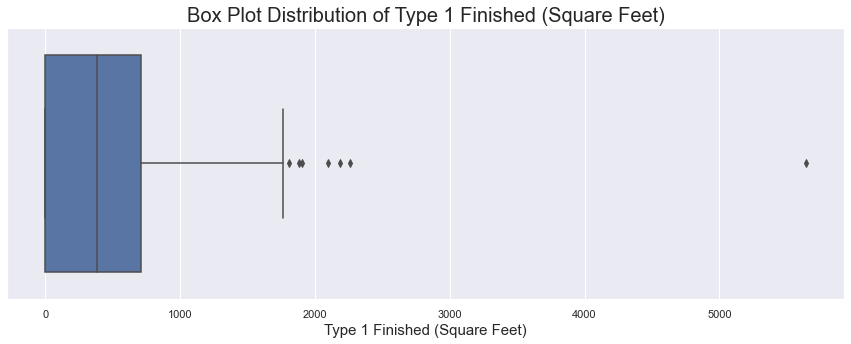

In [383]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.BsmtFinSF1)
plt.title('Box Plot Distribution of Type 1 Finished (Square Feet)', fontdict={'fontsize': 20})
plt.xlabel('Type 1 Finished (Square Feet)', fontdict={'fontsize': 15})
plt.show()

### 3.35 Basement Finished Area Ratings (if multiple types)

In [385]:
raw_data.BsmtFinType2.isna().sum()

38

In [386]:
base_fin_2_df = raw_data.BsmtFinType2.value_counts(sort=False)
base_fin_2_df

GLQ      14
Unf    1256
BLQ      33
ALQ      19
LwQ      46
Rec      54
Name: BsmtFinType2, dtype: int64

In [387]:
raw_data.BsmtFinType2 = raw_data.BsmtFinType2.map({np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [388]:
raw_data.BsmtFinType2.value_counts(sort=False)

0      38
1    1256
2      46
3      54
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

### 3.36 Type 2 Finished (Square feet)

In [389]:
raw_data.BsmtFinSF2.isna().sum()

0

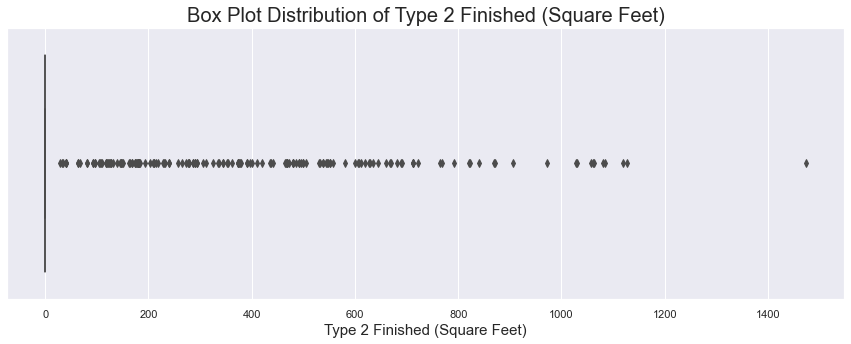

In [390]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.BsmtFinSF2)
plt.title('Box Plot Distribution of Type 2 Finished (Square Feet)', fontdict={'fontsize': 20})
plt.xlabel('Type 2 Finished (Square Feet)', fontdict={'fontsize': 15})
plt.show()

### 3.37 Unfinished Square Feet of Basement Area

In [391]:
raw_data.BsmtUnfSF.isna().sum()

0

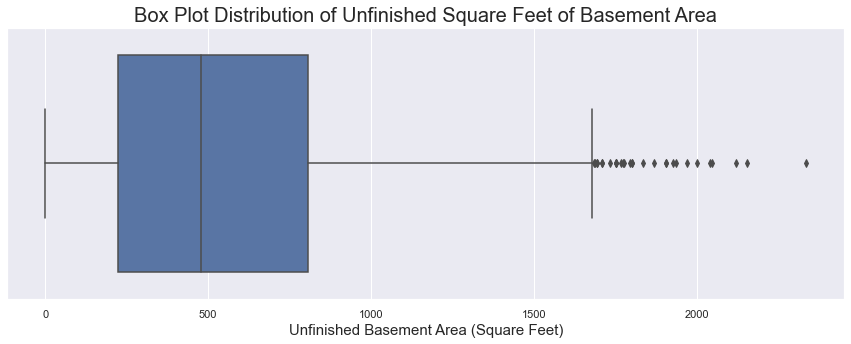

In [392]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.BsmtUnfSF)
plt.title('Box Plot Distribution of Unfinished Square Feet of Basement Area', fontdict={'fontsize': 20})
plt.xlabel('Unfinished Basement Area (Square Feet)', fontdict={'fontsize': 15})
plt.show()

### 3.38 Total Square Feet of Basement Area

In [393]:
raw_data.TotalBsmtSF.isna().sum()

0

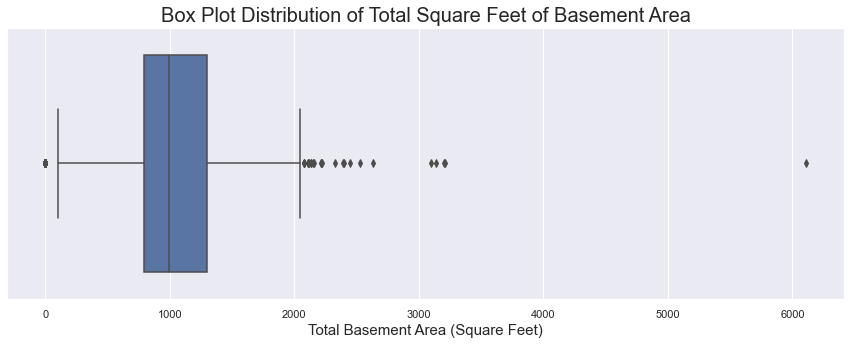

In [394]:
plt.figure(figsize=(15, 5))
sns.boxplot(raw_data.TotalBsmtSF)
plt.title('Box Plot Distribution of Total Square Feet of Basement Area', fontdict={'fontsize': 20})
plt.xlabel('Total Basement Area (Square Feet)', fontdict={'fontsize': 15})
plt.show()